In [14]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import precision_score, recall_score, make_scorer, fbeta_score, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('kickstarter_features_scaled.csv')

In [3]:
df.head()

,backers_count,pledged,country,created_at,deadline,goal,id,launched_date,name,spotlight,staff_pick,state,category,city,days_active,launch_month,launch_day,launch_day_name,launch_month_name,target
0,-0.153653,-0.126677,the United States,2017-06-21 17:18:54,2017-07-22 23:38:29,-0.041769,1166044523,2017-06-21 17:18:54,CrimpCoffee: Good Coffee Good Times,-1.153466,-0.389846,failed,Food,Portland,-0.361168,-0.090239,-0.353999,Wednesday,June,0
1,0.326780,0.043884,Denmark,2020-10-27 13:29:35,2020-12-11 19:58:49,-0.036475,986370978,2020-10-27 13:29:35,Spawns of the Great Rot - Printable stl 3d min...,0.866952,-0.389846,successful,Games,Svendborg,-0.260270,1.086907,-0.870301,Tuesday,October,1
2,-0.152595,-0.126035,the United Kingdom,2017-04-15 22:46:58,2017-05-17 12:59:30,-0.042177,2059825834,2017-04-15 22:46:58,Dreamcatcher Games,-1.153466,-0.389846,failed,Games,Enfield,-0.361168,-0.678812,1.194908,Saturday,April,0
3,-0.056297,-0.064278,the United States,2020-11-04 17:18:51,2021-01-04 05:30:00,-0.038511,1462846972,2020-11-04 17:18:51,Felbar's Shoppe of Curiosities and Occult for ...,0.866952,-0.389846,successful,Games,Chicago,-0.152166,1.381193,-0.353999,Wednesday,November,1
4,-0.018201,-0.021914,the United States,2020-07-20 15:40:27,2020-10-30 16:00:00,-0.034439,1635933643,2020-07-20 15:40:27,Wander: Flavorful and Functional Pantry Staples,0.866952,-0.389846,successful,Food,Brooklyn,0.150526,0.204047,-1.386603,Monday,July,1


In [4]:
def country(x):
    if x == 'the United States':
        return 'USA'
    else:
        return 'Other'
    
df['country_grouped'] = df.country.apply(country)

In [7]:
X= df[['country_grouped', 'goal', 'staff_pick', 'category', 'days_active', 'launch_month', 'launch_day']]
y = df['target']

In [8]:
X = pd.get_dummies(X, columns=['country_grouped', 'category'], drop_first=True)

In [9]:
X.head()

,goal,staff_pick,days_active,launch_month,launch_day,country_grouped_USA,category_Comics,category_Crafts,category_Dance,category_Design,category_Fashion,category_Film & Video,category_Food,category_Games,category_Journalism,category_Music,category_Photography,category_Publishing,category_Technology,category_Theater
0,-0.041769,-0.389846,-0.361168,-0.090239,-0.353999,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.036475,-0.389846,-0.260270,1.086907,-0.870301,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-0.042177,-0.389846,-0.361168,-0.678812,1.194908,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.038511,-0.389846,-0.152166,1.381193,-0.353999,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-0.034439,-0.389846,0.150526,0.204047,-1.386603,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [10]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: target, dtype: int64

In [11]:
X.shape

(171251, 20)

In [12]:
y.shape

(171251,)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [12]:

print('KNN')
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_pred), 
                                                     recall_score(y_test, y_pred)))


KNN
Precision: 0.7950,   Recall: 0.7831


In [39]:
k_range = range(1, 5)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'f1_beta': make_scorer(fbeta_score, beta=0.5)}
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=3, scoring=scorers,refit='precision_score')

In [40]:
# fit the grid with data
grid.fit(X, y)
print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 2}
Best score:  0.8766419416365903


In [41]:
#double checking
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [42]:
print('KNN')
print("Precision: {:6.4f},   Recall: {:6.4f}, Fbeta: {:6.4f}".format(precision_score(y_test, y_pred), 
                                                     recall_score(y_test, y_pred), fbeta_score(y_test, y_pred, beta=0.5)))


KNN
Precision: 0.8806,   Recall: 0.6693, Fbeta: 0.8283


In [43]:
pkl_filename = 'knn_model.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)

In [44]:
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, y_pred)
knn_matrix

array([[13044,  1765],
       [ 6429, 13013]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

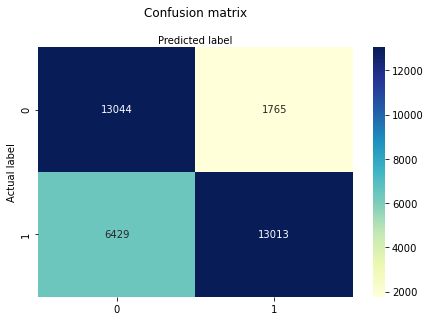

In [50]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(knn_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
#Split data into 3: 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2019)


In [16]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [18]:
precision_train = cross_val_score(knn, X_train, y_train, cv=3, scoring='precision')
recall_train= cross_val_score(knn, X_train, y_train, cv=3, scoring='recall')
fbeta = make_scorer(fbeta_score, beta=0.5)
fbeta_train=cross_val_score(knn, X_train, y_train, cv=3, scoring=fbeta)
print("Precision training: {:6.4f},   Recall training: {:6.4f}, Fbeta training: {:6.4f}".format(np.mean(precision_train), 
                                                     np.mean(recall_train), np.mean(fbeta_train)))

Precision training: 0.7183,   Recall training: 0.4852, Fbeta training: 0.6553


In [19]:
precision_val = cross_val_score(knn, X_val, y_val, cv=3, scoring='precision')
recall_val= cross_val_score(knn, X_val, y_val, cv=3, scoring='recall')
fbeta_val=cross_val_score(knn, X_val, y_val, cv=3, scoring=fbeta)
print("Precision validation: {:6.4f},   Recall validation: {:6.4f}, Fbeta validation: {:6.4f}".format(np.mean(precision_val), 
                                                     np.mean(recall_val), np.mean(fbeta_val)))

Precision validation: 0.7100,   Recall validation: 0.4683, Fbeta validation: 0.6436


In [20]:
import plotly.express as px
fbeta = pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'], 
                     'score': [0.701, 0.644, 0.723,0.740]})

In [33]:
fig = px.bar(data_frame=fbeta,x='model', y='score', text='score')
for data in fig.data:
    data["width"] = 0.5
fig.update_layout(
    title={
        'text': "F-beta Scores for Classification Models",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_traces(textposition='outside')
fig.show()